In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
experiment_dir = '../results/FP_Truthful_Oracle/'

In [32]:
lin_ucb_params = pd.read_csv(experiment_dir + 'lin_ucb_params_run_0.csv')

In [4]:
# Exclude the first 2 iterations because they are not used for training
lin_ucb_params_train = lin_ucb_params[lin_ucb_params['Iteration'] > 1]

In [23]:
group_iter = lin_ucb_params_train.groupby('Iteration') \
    .agg({'num_clicks': 'sum', 'exp_rew': 'sum', 'spent': 'sum'})

In [24]:
group_iter['abs_err'] = np.abs(group_iter['num_clicks'] - group_iter['exp_rew'])

<AxesSubplot:xlabel='Iteration'>

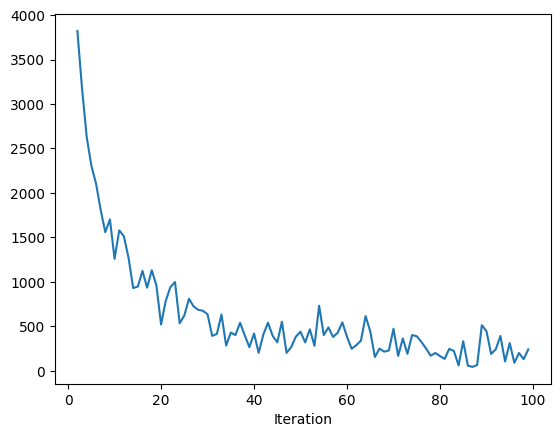

In [25]:
group_iter['abs_err'].plot()

In [26]:
group_iter['abs_perc_err'] = np.abs(group_iter['num_clicks'] - group_iter['exp_rew']) / group_iter['num_clicks']

<AxesSubplot:xlabel='Iteration'>

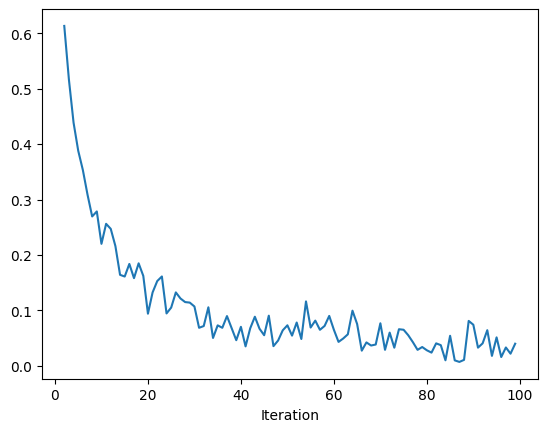

In [27]:
group_iter['abs_perc_err'].plot()

<AxesSubplot:xlabel='Iteration'>

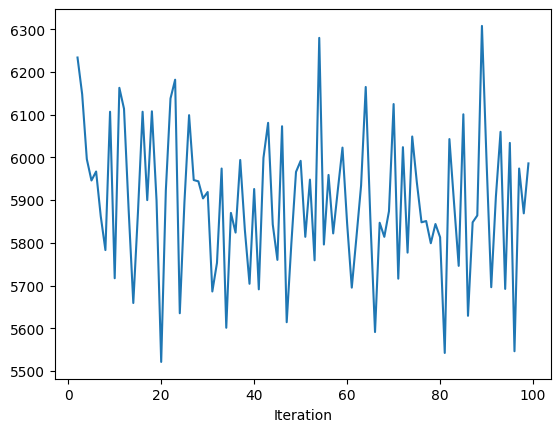

In [28]:
group_iter['num_clicks'].plot()

<AxesSubplot:xlabel='Iteration'>

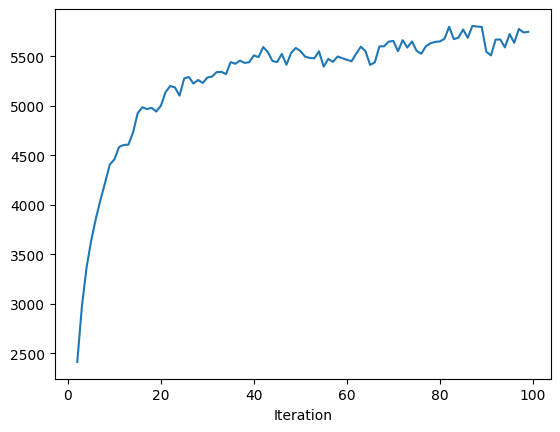

In [29]:
group_iter['exp_rew'].plot()

<AxesSubplot:xlabel='Iteration'>

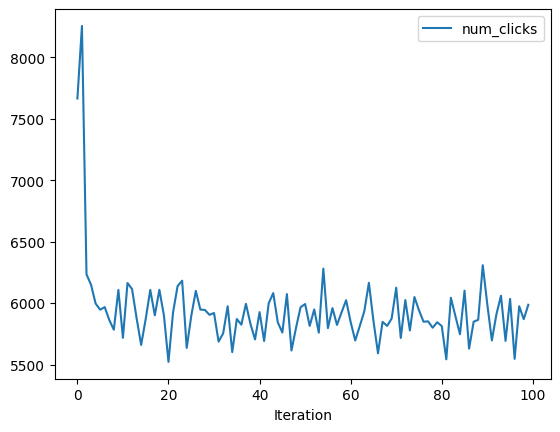

In [36]:
lin_ucb_params.groupby('Iteration').agg({'num_clicks': 'sum'}).plot()

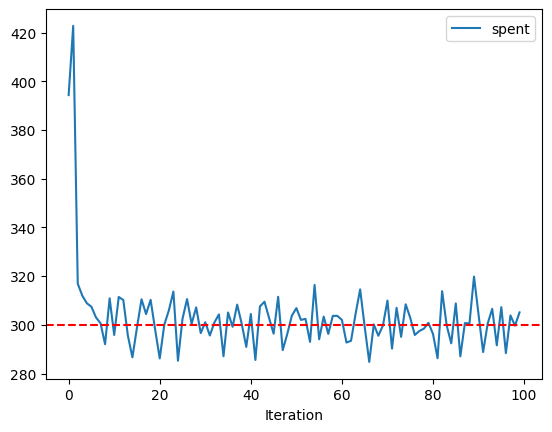

In [35]:
lin_ucb_params.groupby('Iteration').agg({'spent': 'sum'}).plot()
plt.axhline(y=300, color='r', linestyle='--')
plt.show()